'''
@Author: Samadhan Thube

@Date: 14-11-24

@Last modified by: Samadhan Thube

@Last modified Date: 14-11-24 

@Title: Multiple Linear Regression 

'''

Importing Libraries

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Load Dataset

In [ ]:
data = pd.read_csv("D:\ML\Simple Linear Regression\Task 2\weatherHistory.csv")
data


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [80]:
data.shape

(96453, 12)

Inspect the Data

In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
       Temperature (C)  Apparent Temperature (C)      Humidity  

Check for missing values

In [ ]:
print(data.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


Select relevant features for prediction

In [ ]:
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 
                 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
x= data[features]
y= data['Apparent Temperature (C)']


In [84]:
print(x.isna().sum())

Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64


In [85]:
print(y.isna().sum())

0


Visualize outliers with boxplots

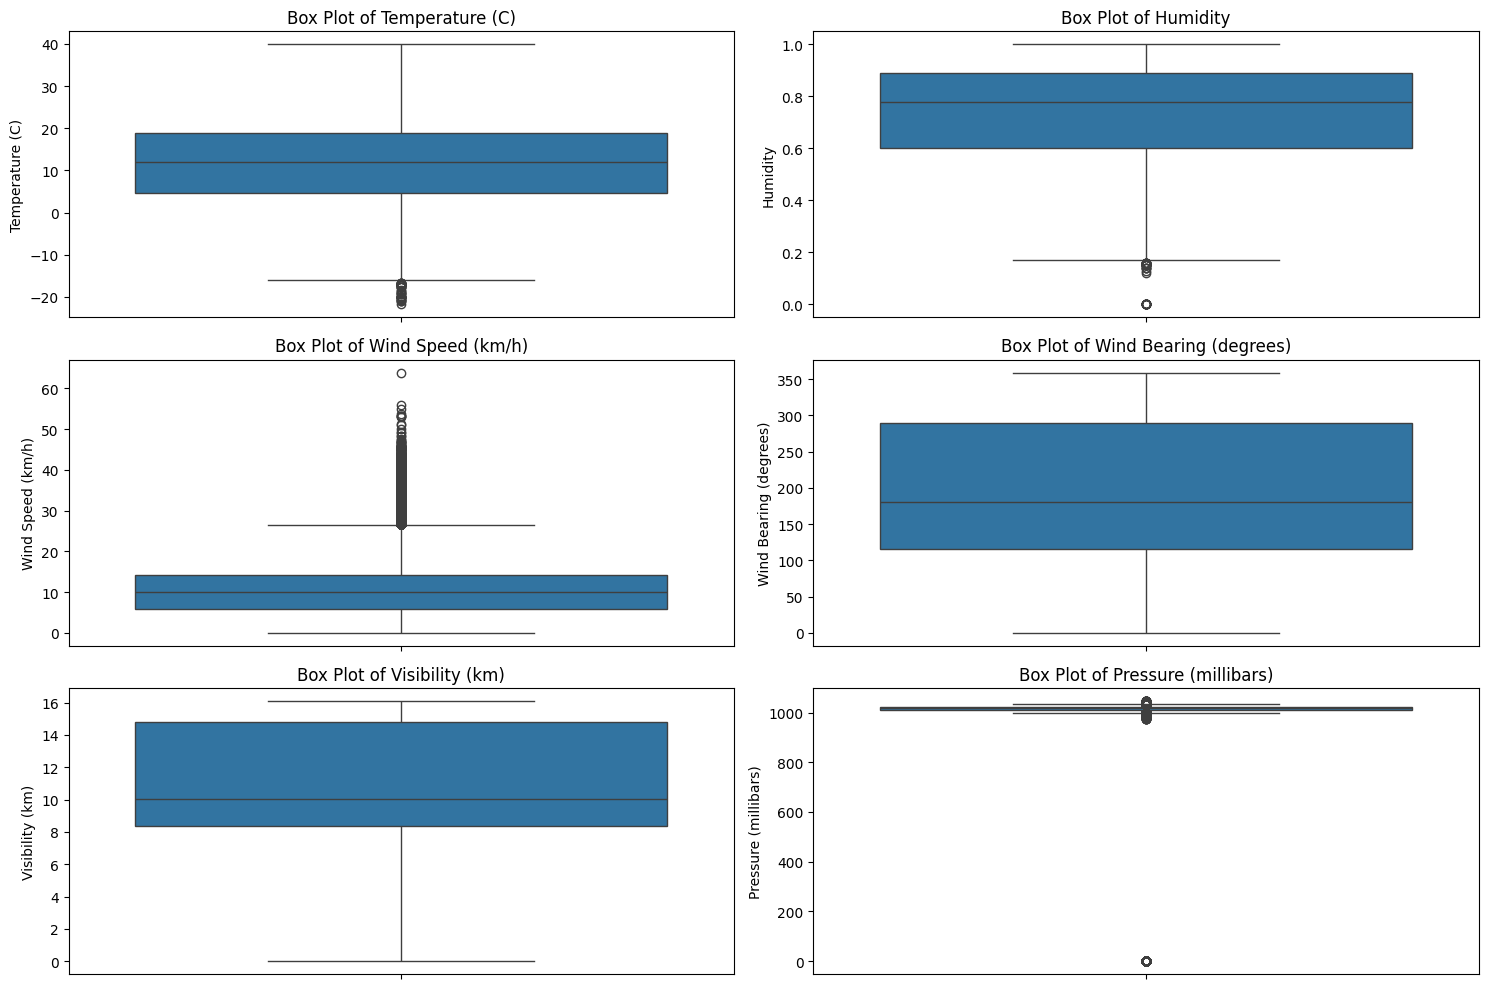

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Remove Outliers using Z-scores

In [87]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(x))

# Set a threshold for Z-scores to identify outliers
threshold = 2

# Removing outliers
data_no_outliers = x[(z_scores < threshold).all(axis=1)]
y_no_outliers = y[data_no_outliers.index]  # Keeping the corresponding target variable

# Display the number of records removed
print(f'Removed outliers, remaining records: {data_no_outliers.shape[0]}')


Removed outliers, remaining records: 80287


Boxplots after outlier removal

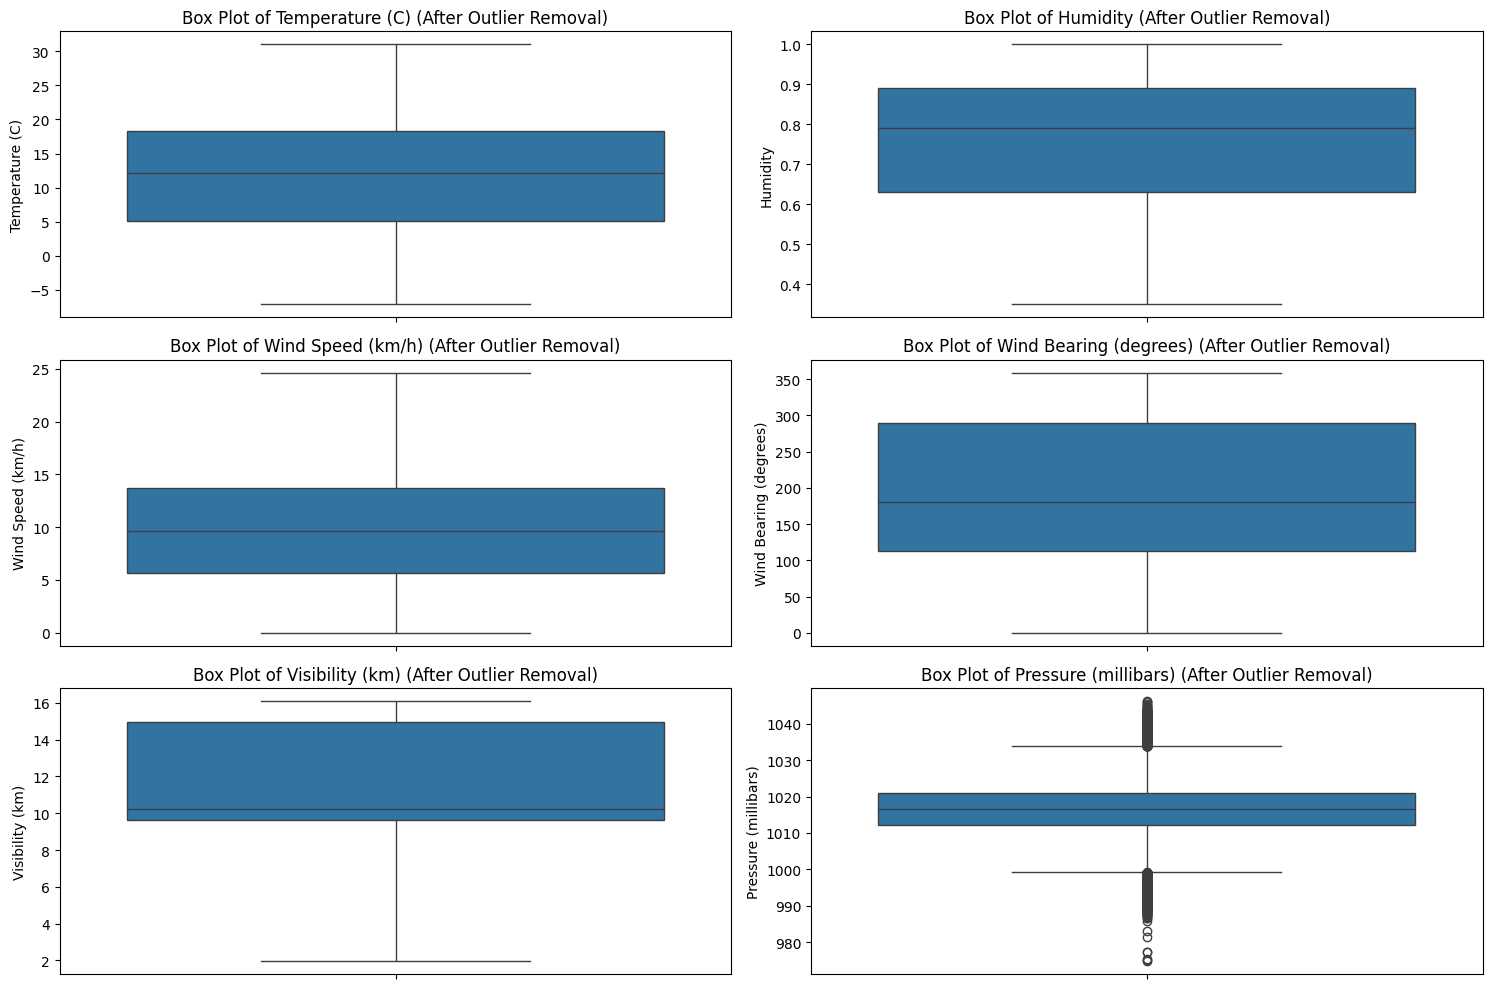

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=data_no_outliers[feature])
    plt.title(f'Box Plot of {feature} (After Outlier Removal)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Splitting the cleaned dataset into training and testing sets

In [ ]:
X_clean = data_no_outliers.values
y_clean = y_no_outliers.values

Plotting Heatmap

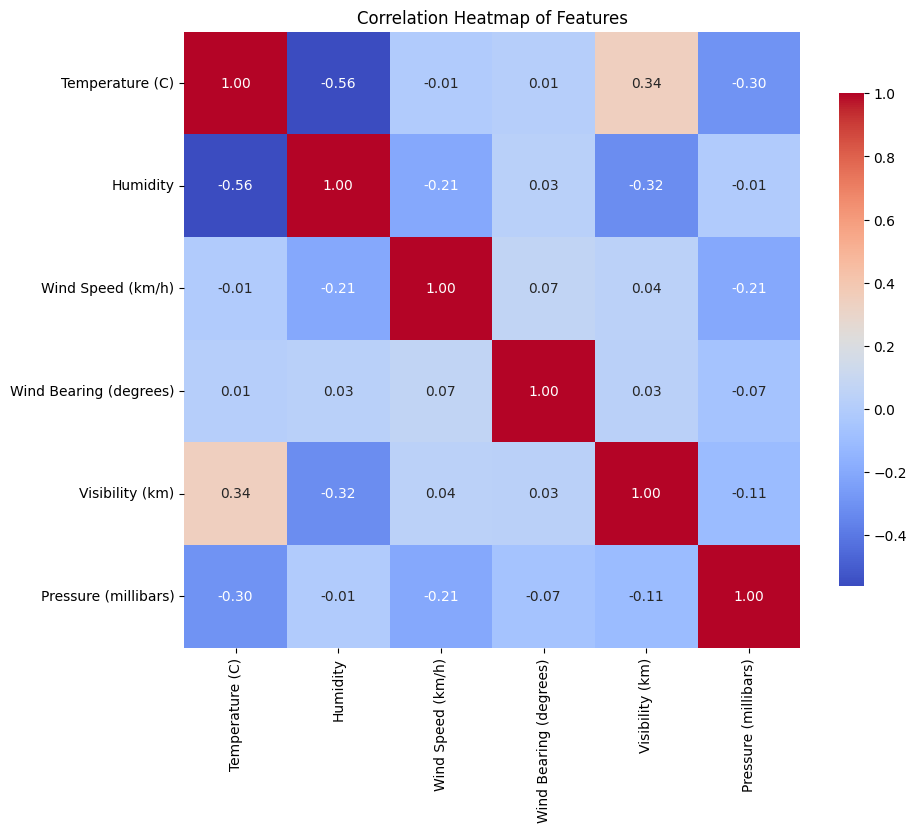

In [90]:
# Convert the cleaned data back to a DataFrame
X_clean = pd.DataFrame(X_clean, columns=features)

# Calculate the correlation matrix
correlation_matrix = X_clean.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()



Splitting

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


Feature Scaling

In [92]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Creating and training the Linear Regression model

In [ ]:

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [94]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.8271385877912922
R-squared: 0.9912160190865391


Plotting the results (actual vs predicted values)

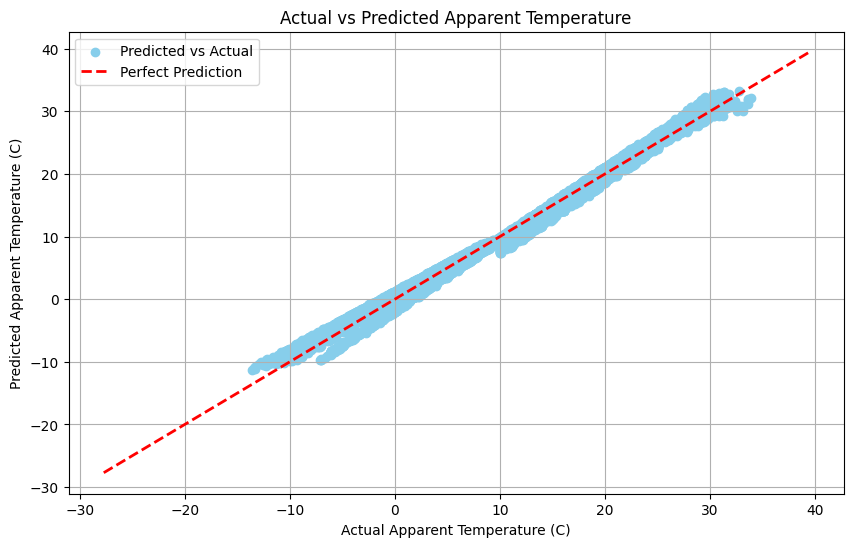

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.legend()
plt.grid()
plt.show()